# TP noté - À envoyer par mail à luc.lesoil@irisa.fr avant le 15 février 2021

Pensez à renommer votre fichier NOM_PRÉNOM.ipynb (ou autre extension) pour éviter de vous retrouver avec la note d'un autre!

Quelques conseils:
- Les réponses demandent toujours au moins une ligne de code
- Commentez les parties complexes et discutez vos résultats
- Avant d'envoyer votre travail, pensez à redémarrer le noyau puis exécuter toutes les cellules pour éviter des étourderies de dernière minute
- Pour les figures, pensez à mettre un titre et à nommer les axes
- Le travail est personnel, sauf si vous m'avez explicitement envoyé un travail en binôme par mail. Je serai plus exigeant avec les travaux de binôme
- Ne restez pas bloqués sur un exercice si vous n'y arrivez pas, passez aux autres!
- Si vous modifiez le jeu de données 'retraite.csv', joignez-le au mail.

Bon courage!

### Importez toutes les libraries du notebook dans la prochaine cellule

Si vous avez importé une librairie un peu particulière, merci de m'indiquer comment l'installer!

In [161]:
import numpy as np
import re
from numpy import random 
import pandas as pd
import matplotlib.pyplot as plt 

# Exercice 1 - Déchiffrement de PlayFair

Le message *break_me* a été chiffré à l'aide du chiffrement de PlayFair (voir https://fr.wikipedia.org/wiki/Chiffre_de_Playfair ).

L'objectif de l'exercice est de le déchiffrer à l'aide de la clef *playFair*.

Pour commencer, voici une explication imagée du déchiffrage :

https://www.youtube.com/watch?v=JMkGYoT3-Rw#t=3m45s -> 5m20s.

In [2]:
# le message à casser
break_me = "gk gvmxh hmx fbsv aixagk"

# la clef associée au chiffrement
playFair = np.array([['f','a','i','r','p'],
                     ['l','y','o','g','b'],
                     ['n','c','x','q','t'],
                     ['k','d','j','e','h'],
                     ['w','u','s','v','m']])        

Je vous propose de suivre les différentes questions pour résoudre l'exercice, mais vous êtes libres de faire vos propres choix d'implémentation si vous êtes à l'aise.

### 1) Introduction 

#### 1) a-] Définissez une fonction *cut_couple*  qui prend une chaine de caractère *msg* en entrée, le découpe en couple de lettres, puis renvoie une liste contenant des couples de lettres. 

On supprimera les espaces pour simplifier le problème. Si le nombre de lettres de la chaine de caractère est impair, on rajoutera le caractère x en bout de chaine.

> **Exemple** : `cut_couple("coupez moi")` renverra `['co', 'up', 'ez', 'mo', 'ix']`

In [1]:
caracterList = []

def cut_couple(string):
    
    if type(string) is not str:
        print("Error : introduisez un string en parametre s'il vous plait")
        return

    caracterList.clear()
    
    for match in re.finditer('_',string):
        caracterList.append(('_',match.start()))
        
    for match in re.finditer(' ',string):
        caracterList.append((' ',match.start()))
    
    ls = string.split(' ')
    localString = ''.join(ls)
    
    ls = localString.split(',')
    localString = ''.join(ls)
    
    ls = localString.split('.')
    localString = ''.join(ls)
    
    ls = localString.split('-')
    localString = ''.join(ls)
    
    ls = localString.split('_')
    localString = ''.join(ls)
    
    ls = localString.split('*')
    localString = ''.join(ls)
    
    ls = localString.split('/n')
    localString = ''.join(ls)
    
    strLength = len(localString)
    listS = []
    i = 0
    
    # cas string pair
    if strLength % 2 == 0:
        while i < strLength:
            listS.append(localString[i:i+2])
            i = i + 2
        return listS
    
    # cas string impair
    while i < strLength-1:
        listS.append(localString[i:i+2])
        i = i + 2
        
    listS.append(localString[strLength-1]+'x')
    
    return listS
    

In [4]:
cut_couple("coupez moi")

['co', 'up', 'ez', 'mo', 'ix']

#### 1) b-] Créez un dictionnaire *positions* contenant la position (index_ligne, index_colonne) de chaque lettre présente dans playFair.

> **Exemple** : la lettre 'i' a pour coordonnées ($x_{i}$,$y_{i}$) = (0,2)

In [5]:
positions = dict(
f = (0,0),
a = (0, 1),
i = (0, 2),
r = (0, 3),
p = (0, 4),
l = (1, 0),
y = (1, 1),
o = (1, 2),
g = (1, 3),
b = (1, 4),
n = (2, 0),
c = (2, 1),
x = (2, 2),
q = (2, 3),
t = (2, 4),
k = (3, 0),
d = (3, 1),
j = (3, 2),
e = (3, 3),
h = (3, 4),
w = (4, 0),
u = (4, 1),
s = (4, 2),
v = (4, 3),
m = (4, 4)    
)


In [6]:
positions

{'f': (0, 0),
 'a': (0, 1),
 'i': (0, 2),
 'r': (0, 3),
 'p': (0, 4),
 'l': (1, 0),
 'y': (1, 1),
 'o': (1, 2),
 'g': (1, 3),
 'b': (1, 4),
 'n': (2, 0),
 'c': (2, 1),
 'x': (2, 2),
 'q': (2, 3),
 't': (2, 4),
 'k': (3, 0),
 'd': (3, 1),
 'j': (3, 2),
 'e': (3, 3),
 'h': (3, 4),
 'w': (4, 0),
 'u': (4, 1),
 's': (4, 2),
 'v': (4, 3),
 'm': (4, 4)}

#### 1) c-] Définissez une fonction *concat_couple*  qui prend une liste de chaines de caractère *list_couple* en entrée, et renvoie une chaine de caractère. 

In [6]:
def concat_couple(strList):
    
    strResult = ''.join(strList)
    return strResult
    
concat_couple(['hel','lo',' ','py', 'th','on'])   

'hello python'

### 2) Travaillez la clef playFair

Différents cas :

#### 2) a-] "Si les deux lettres du couple sont situées sur la même ligne, alors on renvoie les deux lettres situées à gauche." Définissez une fonction *simple_case* qui prend un tableau *tab* et une chaine de caractères contenant un couple de lettre *couple*. La fonction renverra une chaine de caractère contenant le couple de lettres décodé.

> **Exemple** : Le tableau `['f','a','i','r','p']` et le couple de lettres `'pa'` sont donnés en entrée à la fonction *simple_case*. Comme `'r'` est à gauche de `'p'` dans le tableau, on remplace `'p'` par la lettre `'r'`. De même, la lettre `'a'` est remplacée par `'f'`.  Donc, `simple_case(['f','a','i','r','p'], 'pa')` renverra `'rf'`. 

> **Aide** : La première lettre du tableau (ici `'f'`) sera remplacée par la dernière du tableau (ici `'p'`). Donc `simple_case(['f','a','i','r','p'], 'fr')` renverra `'pi'`. 



In [29]:
def simple_case(tab,string):
    stringResult = ''
    tabE = tab
    
    if type(string) is not str:
        print("Error simple_case : must use valid data")
        return
    
    if len(tab) != 5:
        print("Error : list length must be equal to 5")
        return
    
    if len(string) != 2:
        print("Error : string length must be equal to 2")
        return
    
    if type(tab) is np.ndarray:
        tabE = tab.tolist()
    
    i = 0
    while i < 2:
        
        if tabE.index(string[i]) == 0:
            stringResult = stringResult + tabE[len(tabE)-1]
        else:
            stringResult = stringResult + tabE[tabE.index(string[i])-1]
        
        i = i + 1
    
    return stringResult
    

In [30]:
simple_case(['f','a','i','r','p'], 'pa')

'rf'

In [31]:
simple_case(['f','a','i','r','p'], 'fr')

'pi'

Dans le cas où les deux lettres ne sont pas sur les mêmes lignes/colonnes, on renvoie les deux lettres situées dans les coins opposés du rectangle formé par les lettres initiales.

#### 2) b-] Définissez une fonction get_opposite_couple(couple) qui prend une chaine de caractère contenant un couple de lettres en entrée, et renvoie les lettres situées dans les coins opposés.

In [10]:
playFair = np.array([['f','a','i','r','p'],
                     ['l','y','o','g','b'],
                     ['n','c','x','q','t'],
                     ['k','d','j','e','h'],
                     ['w','u','s','v','m']])

> **Exemple** : Si le couple `'fy'` est donné en entrée, on isole le carré délimité par les lettres `'f'` et `'y'`, contenant les lettres `'f'` et `'a'` en première ligne, puis `'l'` et `'y'` en seconde ligne. Le premier coin opposé à `'f'` en première ligne est délimité par `'a'`, on remplace `'f'` par `'a'`. Le second coin est délimité par `'l'`, on remplace `'y'` par `'l'`. Donc, `get_opposite_couple('fy')` renverra `'al'`. De même, `get_opposite_couple('fq')` renverra `'rn'`.

> **Aide** :  On pourra s'aider du dictionnaire *positions* créé en 1) b-]. Par exemple, en notant ($x_{f}$, $y_{f}$) les positions de `'f'` dans le tableau playFair et ($x_{q}$, $y_{q}$) celles de `'q'`, on souhaite juste renvoyer le couple de lettres aux indexes ($x_{f}$, $y_{q}$) = ($x_{r}$, $y_{r}$) et ($x_{q}$, $y_{f}$) =  ($x_{n}$, $y_{n}$).

In [11]:
def get_opposite_couple(couple):
    
    if type(couple) is not str:
        print("Error get_opposite_couple : must use valid data")
        return
    
    if len(couple) != 2:
        print("Error : couple length must be equal to 2")
        return
    
    coupleResult = ''
    
    tupleXY = np.where(playFair == couple[0])
    tupleKJ = np.where(playFair == couple[1])
    
    lineNumX = tupleXY[0][0]
    columnNumY = tupleXY[1][0]
    
    lineNumK = tupleKJ[0][0]
    columnNumJ = tupleKJ[1][0]
   
    #first caracter
    coupleResult = coupleResult + playFair[lineNumX][columnNumJ]
        
    #second caracter
    coupleResult = coupleResult + playFair[lineNumK][columnNumY]
            
    return coupleResult    
    
    

In [12]:
get_opposite_couple('fy')

'al'

In [13]:
get_opposite_couple('fq')

'rn'

### 3) Déchiffrer break_me

On pourra définir une fonction prenant un message :
- Pour chaque couple de lettres isolées en 1), déterminer si ces lettres sont sur la même ligne/colonne
- Si oui, appliquer 2)a-] sur la bonne ligne/colonne
- Sinon, appliquer 2)b-]
- Stocker les résultats, recomposer la chaine de caractère, et la retourner.

Affichez *break_me* déchiffrée! Quelle phrase était codée à l'origine?

> **Bonus** : Gardez en mémoire les espaces! Adaptez les questions 1)a-] et 1)c-] pour reconstituer le message original.

In [70]:

def breakerFunc(message):
    
    if type(message) is not str:
        print('Error : breakFunc work only with strings !')
    
    if message == '' or message == ' ':
        print('Error breakFunc : please enter a valid data')
        
        
    listOfCouple = cut_couple(message)
    
    listOfResult = []
    
    #iteration over couples
    for couple in listOfCouple:
        #print(couple)
        
        tupleXY = np.where(playFair == couple[0])
        tupleKJ = np.where(playFair == couple[1])
    
        lineNumX = tupleXY[0][0]
        columnNumY = tupleXY[1][0]
    
        lineNumK = tupleKJ[0][0]
        columnNumJ = tupleKJ[1][0]
        
        #case couple letter are the same or are in the same line
        if (lineNumX == lineNumK and columnNumY == columnNumJ) or (lineNumX == lineNumK and columnNumY != columnNumJ):
            
            listOfResult.append( simple_case(playFair[lineNumX],couple) )
        
        #case couple letter are the same or are in the same column
        elif columnNumY == columnNumJ:
            localCouple = ''
            
            if lineNumX == 0:
                localCouple = localCouple + playFair[4][columnNumY]
            else:
                localCouple = localCouple + playFair[lineNumX-1][columnNumY]
            
            if lineNumK == 0:
                localCouple = localCouple + playFair[4][columnNumJ]
            else:
                localCouple = localCouple + playFair[lineNumK-1][columnNumJ]
            
            listOfResult.append( localCouple )
            
        else:
            listOfResult.append( get_opposite_couple(couple) )    
    
    messageResult = concat_couple(listOfResult)
    
    for tupl in caracterList:
        messageResult = messageResult[:tupl[1]] + tupl[0] + messageResult[tupl[1]:] 

    print('msg to break : '+message)
    print('msg broken : '+messageResult)
    
    if len(messageResult) > len(message):
        messageResult = messageResult[0:len(messageResult)-1]
        print('msg broken without the letter x ( in case of impair msg) : '+messageResult)
        
breakerFunc('break_me')


msg to break : break_me
msg broken : gpdrh_wjq
msg broken without the letter x ( in case of impair msg) : gpdrh_wj


# Exercice 2

♩ Toss a coin to your teacher ♩

### 1) Définissez une classe CoinToss qui lance virtuellement une pièce.

La classe CoinToss aura au minimum:
- un argument *coinValue*. Il sera initialisé à 'Pile' ou 'Face' avec une probabilité $\frac{1}{2}$ si le constructeur ne donne pas de valeur par défaut à coinValue. Si la valeur est renseignée dans le constructeur, elle sera affectée à *coinValue*.
- un getter et un setter associés à *coinValue*.
- une méthode *toss*, qui réinitialisera la valeur de *coinValue*.

In [268]:

class CoinToss:
    
    def __init__(self, coinValue=None):
        if coinValue == None:
            ## adding __ to the variable make it private
            self.coinValue = 'Pile' if random.binomial(n=1, p=0.5, size=1)[0] == 0 else 'Face'
            
        else:
            self.coinValue = coinValue
            
    def toss(coinClass):
        coinClass.coinValue = 'Pile' if random.binomial(n=1, p=0.5, size=1)[0] == 0 else 'Face'
        return coinClass.coinValue
        
    def getCoinValue(this):
        return this.coinValue
    
    def setCoinValue(this, coinValue):
        if value != 'Face' and value != 'Pile':
            print('Eroor : please enter either Pile or Face as string')
            return 
        
        this.coinValue = coinValue
    


### 2) Définissez une classe FakeCoinToss, qui lancera virtuellement une pièce non équilibrée.

La classe FakeCoinToss héritera de CoinToss.

On surchargera la méthode *toss* pour qu'elle réinitialise la pièce 7 fois sur 10 à 'Pile', et trois fois sur 10 à 'Face'.

In [269]:

class FakeCoinToss(CoinToss):
    
    def __init__(self, coinValue = None):
        CoinToss.__init__(self, coinValue)

    def toss(this):
        this.coinValue = 'Pile' if random.binomial(n=1, p=0.3, size=1)[0] == 0 else 'Face'
        return this.coinValue



### 3) Lancez 100 fois une pièce avec CoinToss, définie à la question 1, et 100 fois avec FakeCoinToss, définie à la question 2.

Vérifiez que vous obtenez bien un nombre de 'Pile' et de 'Face' cohérent avec les consignes.

In [341]:

coinToss = CoinToss()
arrayCoinToss = []

fakeCoinToss = FakeCoinToss()
arrayfakeCoinToss = []

for i in range(100):
    arrayCoinToss.append(coinToss.toss())
    
for i in range(100):
    arrayfakeCoinToss.append(fakeCoinToss.toss())

print('*** CoinToss ***')
print('* Number of Pile in CoinToss : ',arrayCoinToss.count('Pile'), '/ 100, which equal to : ',arrayCoinToss.count('Pile') /10, '/ 10' )
print('* Number of Pile in CoinToss : ',arrayCoinToss.count('Face'), '/ 100, which equal to : ',arrayCoinToss.count('Face') /10, '/ 10' )

print('  ')
print('** Checking result of CoinToss with isclose method and 10 as absolute tolerence : ')

if np.isclose(arrayCoinToss.count('Pile'),50, atol = 10):
    print('results are coherent with instructions')
else:
    print('results are not coherent with instructions')

print('  ')
print('*** FakeCoinToss ***')
print('* Number of Pile in FakeCoinToss : ',arrayfakeCoinToss.count('Pile'), '/ 100, which equal to : ',arrayfakeCoinToss.count('Pile') /10, '/ 10' )
print('* Number of Pile in FakeCoinToss : ',arrayfakeCoinToss.count('Face'), '/ 100, which equal to : ',arrayfakeCoinToss.count('Face') /10, '/ 10' )

print('  ')
print('** Checking result of FakeCoinToss with isclose method and 10 as absolute tolerence : ')

if np.isclose(arrayfakeCoinToss.count('Pile'),70, atol = 10 ):
    print('results are coherent with instructions')
else:
    print('results are not coherent with instructions')

    
    

*** CoinToss ***
* Number of Pile in CoinToss :  57 / 100, which equal to :  5.7 / 10
* Number of Pile in CoinToss :  43 / 100, which equal to :  4.3 / 10
  
** Checking result of CoinToss with isclose method and 10 as absolute tolerence : 
results are coherent with instructions
  
*** FakeCoinToss ***
* Number of Pile in FakeCoinToss :  77 / 100, which equal to :  7.7 / 10
* Number of Pile in FakeCoinToss :  23 / 100, which equal to :  2.3 / 10
  
** Checking result of FakeCoinToss with isclose method and 10 as absolute tolerence : 
results are coherent with instructions


# Problème

Vous aurez besoin du dataset 'retraite.csv'. Ce jeu de données est généré à la main. Il contient de (fausses) données sur le parcours professionel de plusieurs (fausses) personnes.

Description des variables:
- **prenom** contient le prénom de la personne considérée (un prénom est associé à une personne)
- **revenus_bruts** contient les revenus bruts des personnes
- **mois** contient le mois associé à ces revenus
- **annee** contient l'année associée à ces revenus
- **cotisation** contient vrai si la personne cotise pour sa retraite à ce moment-là

### 1) Importez le jeu de données, puis affichez les cinq premières lignes

In [3]:

retraite = pd.read_table('retraite.csv', delimiter = ',')

pd.read_table('retraite.csv', delimiter = ',', nrows = 5)



,prenom,mois,annee,revenus_bruts,cotisation
0,Catherine,janvier,1979,1600,True
1,Catherine,février,1979,1600,True
2,Catherine,mars,1979,1600,True
3,Catherine,avril,1979,1600,True
4,Catherine,mai,1979,1600,True


### 2) Description des données

#### 2) a-]  Quel est le type de la variable cotisation? Affichez le en console

In [376]:

print('The type of : ',retraite.columns[4],' is : ',retraite.dtypes[4])




The type of :  cotisation  is :  bool


#### 2) b-]  Affichez les dimensions du dataframe

In [380]:
print('The shape dataframe retraite is : ', retraite.shape)

The shape dataframe retraite is :  (1968, 5)


#### 2) c-]  Combien de prénoms différents contient le dataset?

In [390]:

print('The number of unique prénoms on the dataset is : ', len(pd.unique(retraite['prenom'])), ' : ',pd.unique(retraite['prenom']))



The number of unique prénoms on the dataset is :  4  :  ['Catherine' 'Daniel' 'Marie' 'Patrick']


### 3) Extraction des données et statistiques descriptives

#### 3) a-]  Quelle période couvre le dataset?

In [23]:
minimumYear = retraite['annee'].min()

result = retraite[retraite['annee'] == minimumYear]

monthsArray = pd.unique(result['mois'])

minMonth = ''

if 'janvier' in monthsArray:
    minMonth = 'janvier'
    
elif 'février' in monthsArray:
    minMonth = 'février'
    
elif 'mars' in monthsArray:
    minMonth = 'mars'
    
elif 'avril' in monthsArray:
    minMonth = 'avril'
    
elif 'mai' in monthsArray:
    minMonth = 'mai'
    
elif 'juin' in monthsArray:
    minMonth = 'juin'
    
elif 'juillet' in monthsArray:
    minMonth = 'juillet'
    
elif 'août' in monthsArray:
    minMonth = 'août'
    
elif 'septembre' in monthsArray:
    minMonth = 'septembre'
    
elif 'octobre' in monthsArray:
    minMonth = 'octobre'
    
elif 'novembre' in monthsArray:
    minMonth = 'novembre'
    
elif 'décembre' in monthsArray:
    minMonth = 'décembre'
    
print('The beggining period covered by the retraite dataframe is : ', minMonth, minimumYear)


The beggining period covered by the retraite dataframe is :  janvier 1979


In [22]:
maxYear = retraite['annee'].max()

result = retraite[retraite['annee'] == maxYear]

monthsArray = pd.unique(result['mois'])

maxMonth = ''

if 'décembre' in monthsArray:
    maxMonth = 'décembre'
    
elif 'novembre' in monthsArray:
    maxMonth = 'novembre'

elif 'octobre' in monthsArray:
    maxMonth = 'octobre'

elif 'septembre' in monthsArray:
    maxMonth = 'septembre'

elif 'août' in monthsArray:
    maxMonth = 'août'

elif 'juillet' in monthsArray:
    maxMonth = 'juillet'

elif 'juin' in monthsArray:
    maxMonth = 'juin'

elif 'mai' in monthsArray:
    maxMonth = 'mai'

elif 'avril' in monthsArray:
    maxMonth = 'avril'
    
elif 'mars' in monthsArray:
    maxMonth = 'mars'
    
elif 'février' in monthsArray:
    maxMonth = 'février'

elif 'janvier' in monthsArray:
    maxMonth = 'janvier'
    
print('The ending period covered by the retraite dataframe is : ', maxMonth, maxYear)


The ending period covered by the retraite dataframe is :  décembre 2019


#### 3) b-]  Quelle est la moyenne des revenus bruts?

In [27]:
print('The average revenus bruts is : ', retraite['revenus_bruts'].mean())

The average revenus bruts is :  2162.737804878049


#### 3) c-]  Quels ont été les revenus bruts de Patrick en janvier 1979?

In [73]:
query = retraite.query("prenom == 'Patrick' and annee == 1979 and mois == 'janvier'")['revenus_bruts']

print('Les revenus bruts de Patrick en janvier 1979 sont :', query[query.index[0]])


Les revenus bruts de Patrick en janvier 1979 sont : 1700


#### 3) d-]  Quel montant brut a touché Catherine sur toute l'année 1983?

In [81]:
query = retraite.query("prenom == 'Catherine' and annee == 1983 ")['revenus_bruts']

montantTotal = 0
for montant in query:
    montantTotal = montantTotal + montant

print("Le montant brut qu'a touché Catherine sur toute l'année 1983 est de :",montantTotal)

Le montant brut qu'a touché Catherine sur toute l'année 1983 est de : 19392


### 4) Transformation des données

#### 4) a-] Créez un dataset contenant les revenus bruts annuels moyens de Patrick. 

In [136]:
PatrickDataFrame = retraite.query("prenom == 'Patrick' ").reset_index() #.drop('mois',1).drop('cotisation',1).drop('prenom',1).reset_index().drop('index',1)

years = pd.unique(PatrickDataFrame['annee'])
revenus_bruts_annuels = []

for year in years:
    revenus_bruts_annuels.append(PatrickDataFrame[PatrickDataFrame['annee'] == year]['revenus_bruts'].mean())

PatrickDataFrameWithAvergeRevenusPerYear = pd.DataFrame({"Year" : years, "revenus_bruts_annuels" : revenus_bruts_annuels})

print('*** Patrick revenus bruts annuels moyens dataFrame :')
print(' ')
print(PatrickDataFrameWithAvergeRevenusPerYear)


*** Patrick revenus bruts annuels moyens dataFrame :
 
    Year  revenus_bruts_annuels
0   1979                 1700.0
1   1980                 1734.0
2   1981                 1768.0
3   1982                 1804.0
4   1983                 1804.0
5   1984                 1840.0
6   1985                 1840.0
7   1986                 1858.0
8   1987                 1914.0
9   1988                 1971.0
10  1989                 2011.0
11  1990                 2051.0
12  1991                 2092.0
13  1992                 2113.0
14  1993                 2134.0
15  1994                 2198.0
16  1995                 2220.0
17  1996                 2242.0
18  1997                 2242.0
19  1998                 2242.0
20  1999                 2265.0
21  2000                 2310.0
22  2001                 2356.0
23  2002                 2403.0
24  2003                 2451.0
25  2004                 2500.0
26  2005                 2575.0
27  2006                 2653.0
28  2007         

#### 4) b-] Créez une variable revenus_nets à l'aide de la variable revenus_bruts. 

Pour grossièrement passer d'un salaire brut à un salaire net, il faut retrancher 23% du salaire brut pour un employé du privé et 15% pour un employé de la fonction publique.

Patrick est employé de la fonction publique, les autres sont employés dans le privé.

In [159]:
revenus_nets = []

for index in retraite.index:
    
    if retraite['prenom'][index] == 'Patrick':
        revenus_nets.append(  retraite['revenus_bruts'][index] - retraite['revenus_bruts'][index]*15/100  )
    else:
        revenus_nets.append(  retraite['revenus_bruts'][index] - retraite['revenus_bruts'][index]*23/100  )

retraite['revenus_nets'] = revenus_nets
print(retraite)




         prenom       mois  annee  revenus_bruts  cotisation  revenus_nets
0     Catherine    janvier   1979           1600        True       1232.00
1     Catherine    février   1979           1600        True       1232.00
2     Catherine       mars   1979           1600        True       1232.00
3     Catherine      avril   1979           1600        True       1232.00
4     Catherine        mai   1979           1600        True       1232.00
...         ...        ...    ...            ...         ...           ...
1963    Patrick       août   2019           3047        True       2589.95
1964    Patrick  septembre   2019           3047        True       2589.95
1965    Patrick    octobre   2019           3047        True       2589.95
1966    Patrick   novembre   2019           3047        True       2589.95
1967    Patrick   décembre   2019           3047        True       2589.95

[1968 rows x 6 columns]


### 5) Visualisation graphique

#### 5) a-] Affichez un boxplot comparant les distributions de salaires nets des différentes personnes du dataset. 

<function matplotlib.pyplot.show(*args, **kw)>

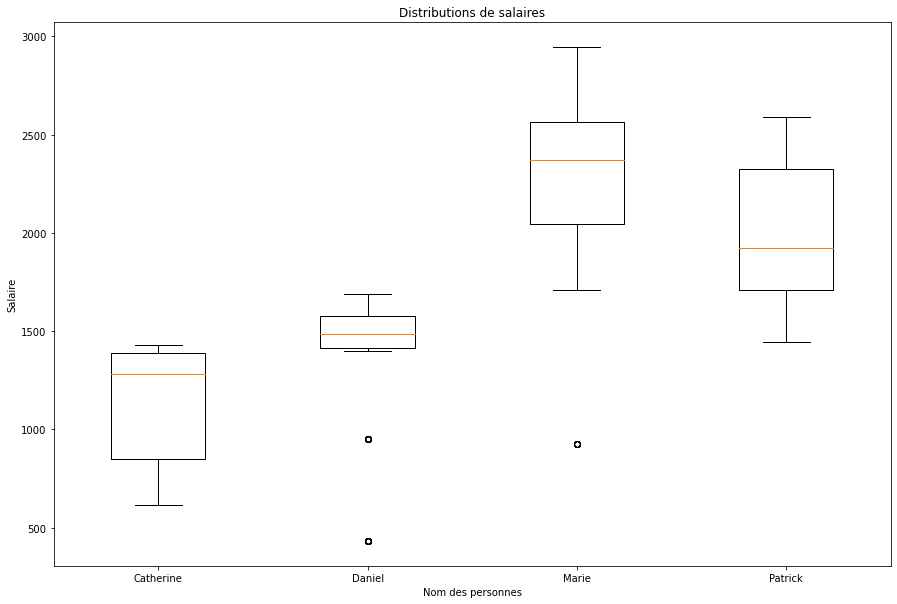

In [247]:
plt.subplots(figsize=(15,10))

reNetsCatherine = retraite[retraite['prenom'] == 'Catherine']['revenus_nets']
reNetsDaniel = retraite[retraite['prenom'] == 'Daniel']['revenus_nets']
reNetsMarie = retraite[retraite['prenom'] == 'Marie']['revenus_nets']
reNetsPatrick = retraite[retraite['prenom'] == 'Patrick']['revenus_nets']

plt.boxplot( [reNetsCatherine, reNetsDaniel, reNetsMarie, reNetsPatrick ]  )


plt.xlabel('Nom des personnes')
plt.ylabel('Salaire')
plt.title('Distributions de salaires')
plt.xticks([1,2,3,4], pd.unique(retraite['prenom']) )
plt.show


#### 5) b-] Comparez les variations de salaires (écart-type) par personne. Quelle personne a les revenus les plus fluctuants d'après le graphique? Quelle personne a les revenus les plus fluctuants en écart-type? Comment expliquez-vous cette différence?

[249.59411300953866, 363.72197350398875, 411.3430149846731, 350.5081338325947]


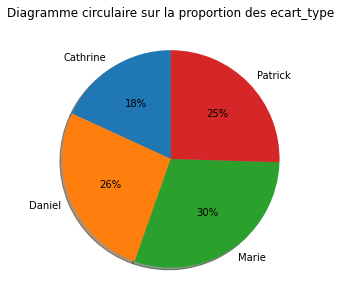

In [251]:

ecart_type = [np.std(reNetsCatherine),np.std(reNetsDaniel),np.std(reNetsMarie),np.std(reNetsPatrick)]

print(ecart_type)

plt.figure(figsize=(5,5))
plt.pie(ecart_type,
        startangle = 90,
        labels = list(("Cathrine", "Daniel","Marie","Patrick")),
        autopct='%1.f%%',
        shadow = True)
plt.title("Diagramme circulaire sur la proportion des ecart_type")
plt.show()


### 6) Méthodes statistiques


Pour cette question, utilisez les données de la question 4a!

#### 6) a-] Modéliser l'évolution du salaire de Patrick au cours du temps à l'aide d'une régression. 

#### 6) b-] Pouvez-vous prédire ce que gagnera Patrick (en brut) s'il est toujours dans la fonction publique dans 10 ans? 

#### 6) c-] Quelle est la valeur de son augmentation annuelle? 

#### 6) d-] Affichez le R² associé à la régression; le modèle vous parait-il correct? Affichez la droite de régression pour vérifier!

Commentez ces résultats.